<center>

# _Naïve Bayes Text Classification_

</center>

<center>

# A_Patnaik_V_Jain_M10_Assignment

</center>

# Introduction:

Sentiment analysis, also known as opinion mining, is the process of analyzing text data to determine the sentiment expressed within it. In this project, we aim to perform sentiment analysis on a collection of movie reviews to classify them as positive or negative. This task is essential for understanding audience reactions to movies, assisting in recommendation systems, and analyzing trends in public opinion.

#### Steps to Address the Problem:

* Data Acquisition
* Data Preprocessing
* Frequency distribution plot & Feature extraction
* Model Selection
* Model Training
* Model Evaluation
* Fine-tuning and Optimization
* Deployment and Application
* Conclusion
* Overall Observation

In [1]:
#Import required Libraries
import pandas as pd
import os
import shutil
import urllib.request
import requests
import tarfile
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Data Acquisition

In [2]:
# Clone the Github repository
repo_url = 'https://github.com/Ansuman21/Data-science-M10'
repo_dir = 'Data-science-M10-main'  # Directory where repository will be cloned
if not os.path.exists(repo_dir):
    os.makedirs(repo_dir)
    Repo.clone_from(repo_url, repo_dir)

# Define directories
neg_dir = os.path.join(repo_dir, 'neg')
pos_dir = os.path.join(repo_dir, 'pos')

# Check if directories exist, if not create them
if not os.path.exists(neg_dir):
    os.makedirs(neg_dir)
if not os.path.exists(pos_dir):
    os.makedirs(pos_dir)

#### Inference
* The Github repository was cloned from the provided URL, 'https://github.com/Ansuman21/Data-science-M10', into the directory named 'Data-science-M10-main'.
* Directories for negative ('neg') and positive ('pos') reviews were defined within the cloned repository directory.
* It was verified whether the negative and positive directories exist. If not, they were created accordingly.

In [3]:
# Load neg directory
for filename in os.listdir(neg_dir):
    shutil.copy(os.path.join(neg_dir, filename), 'neg')  # Copy files to local 'neg' directory

# Load pos directory
for filename in os.listdir(pos_dir):
    shutil.copy(os.path.join(pos_dir, filename), 'pos')  # Copy files to local 'pos' directory

print("Directories loaded successfully.")

Directories loaded successfully.


#### Inference
* The negative reviews were loaded from the 'neg' directory within the cloned repository. Each file within the 'neg' directory was copied to the local 'neg' directory.
* Similarly, the positive reviews were loaded from the 'pos' directory within the cloned repository. Each file within the 'pos' directory was copied to the local 'pos' directory.
* Upon successful completion of loading the directories, a confirmation message "Directories loaded successfully." was printed.

# Data Preprocessing

In [4]:
# Count the number of negative reviews
num_neg_reviews = len(os.listdir(neg_dir))
print("Number of Negative Reviews:", num_neg_reviews)

# Count the number of positive reviews
num_pos_reviews = len(os.listdir(pos_dir))
print("Number of Positive Reviews:", num_pos_reviews)

Number of Negative Reviews: 1000
Number of Positive Reviews: 1000


#### Inference
The number of negative reviews was counted, resulting in a total of 1000 negative reviews. Similarly, the number of positive reviews was counted, yielding a total of 1000 positive reviews.

In [5]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    return text

# Load negative reviews
neg_reviews = []
for filename in os.listdir(neg_dir):
    with open(os.path.join(neg_dir, filename), 'r', encoding='utf-8') as file:
        review = file.read()
        neg_reviews.append(preprocess_text(review))

# Load positive reviews
pos_reviews = []
for filename in os.listdir(pos_dir):
    with open(os.path.join(pos_dir, filename), 'r', encoding='utf-8') as file:
        review = file.read()
        pos_reviews.append(preprocess_text(review))

#### Inference
* A function was defined to preprocess text data.
* Negative reviews were loaded from the directory, preprocessed, and stored in a list called neg_reviews.
* Positive reviews were loaded from the directory, preprocessed, and stored in a list called pos_reviews.

In [6]:
# Combine negative and positive reviews
all_reviews = neg_reviews + pos_reviews

# Create labels for negative and positive reviews
labels = ['NEG'] * len(neg_reviews) + ['POS'] * len(pos_reviews)

# Create a CountVectorizer to create the term-document matrix
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer to the reviews and transform the reviews into a term-document matrix
term_doc_matrix = vectorizer.fit_transform(all_reviews)

# Convert term-document matrix to numpy array
term_doc_matrix_array = term_doc_matrix.toarray()

print("Term-Document Matrix Shape:", term_doc_matrix_array.shape)
print("Labels:", labels)

Term-Document Matrix Shape: (2000, 39354)
Labels: ['NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG

#### Inference
* Negative and positive reviews were combined into a single list named all_reviews.
* Labels were created for the negative and positive reviews, with 'NEG' labels assigned to negative reviews and 'POS' labels assigned to positive reviews.
* A CountVectorizer was instantiated with English stop words.
* The vectorizer was fitted to the combined reviews and transformed into a term-document matrix.
* The term-document matrix was converted into a NumPy array named term_doc_matrix_array.
* The shape of the term-document matrix was printed along with the labels.

# Frequency distribution plot & Feature extraction

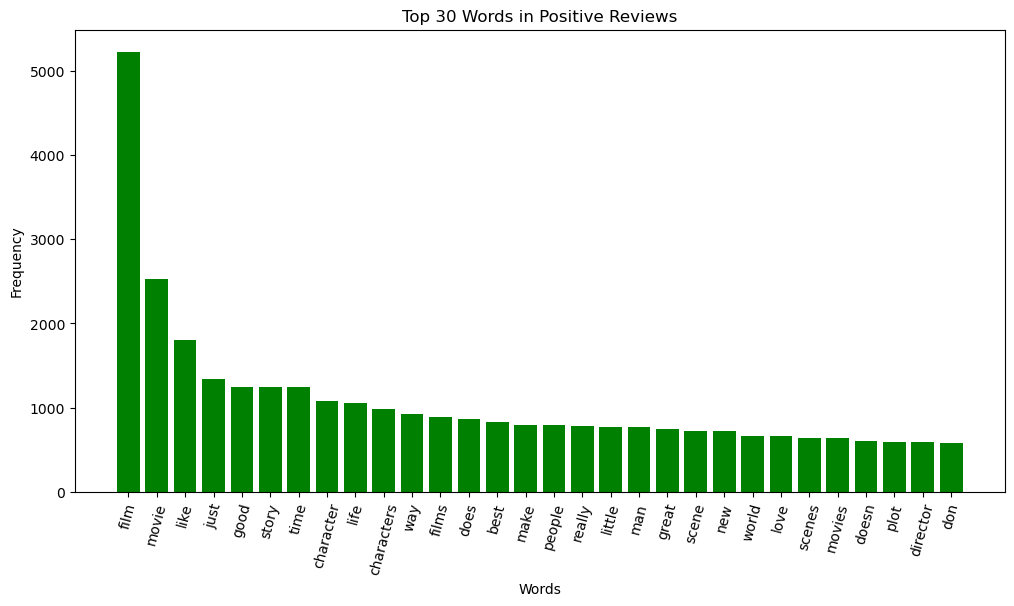

In [7]:
# Calculate word frequencies for positive reviews
pos_word_freq = np.sum(term_doc_matrix_array[len(neg_reviews):], axis=0)

# Get the indices of the top 30 most frequent words for positive reviews
top_pos_indices = np.argsort(pos_word_freq)[::-1][:30]

# Get the corresponding words
top_pos_words = [vectorizer.get_feature_names_out()[i] for i in top_pos_indices]

# Get the frequency counts of the top 30 words for positive reviews
top_pos_freq = [pos_word_freq[i] for i in top_pos_indices]

# Plot the frequency distribution for positive reviews
plt.figure(figsize=(12, 6))
plt.bar(top_pos_words, top_pos_freq, color='green')
plt.title('Top 30 Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
plt.show()

#### Inference
* The bar chart titled "Top 30 Words in Positive Reviews" analyzed the frequency of specific words used in positive reviews.
* The word "film" appeared most frequently, suggesting it was commonly used in positive reviews.
* Other frequently occurring words included "movie," "like," and "just," although they occurred less frequently compared to "film."
* A descending trend in frequency was observed from the most used word to the 30th word on the list.
* The word "film" had the highest frequency, indicating its common usage in positive reviews, while "don" had the lowest frequency among the top 30.
* Certain terms like "good," "story," "character," "best," "great," and "love" were associated with positive sentiment in reviews.
* Insights from the data could inform content creation, marketing strategies, and sentiment analysis algorithms.
<br>

**However, some words like "just," "like," and "time" might not provide clear insights without context. The analysis was limited to the top 30 words, and the source, methodology, and context of the reviews were not provided.**

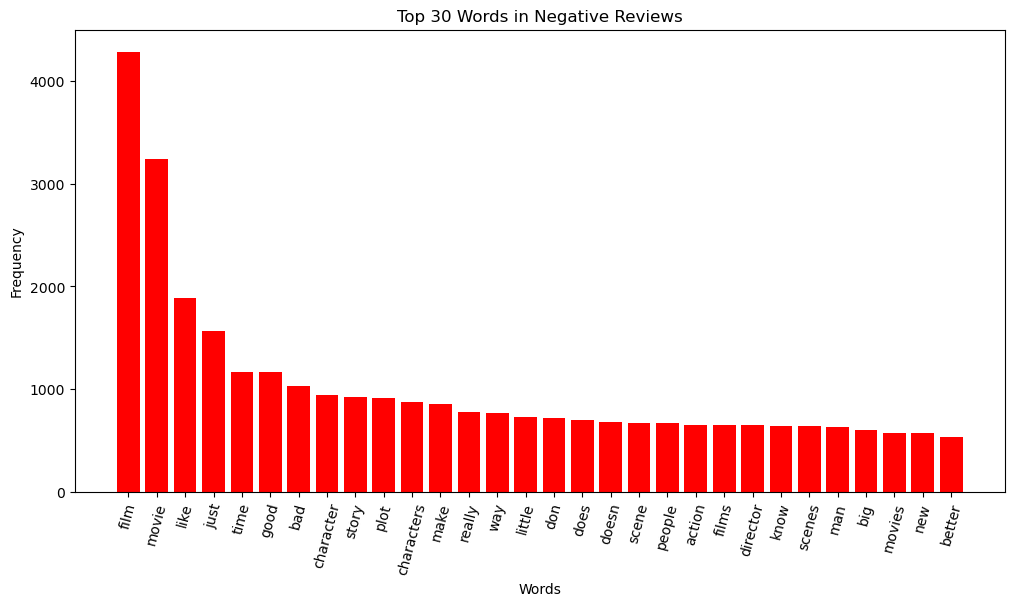

In [8]:
# Calculate word frequencies for negative reviews
neg_word_freq = np.sum(term_doc_matrix_array[:len(neg_reviews)], axis=0)

# Get the indices of the top 30 most frequent words for negative reviews
top_neg_indices = np.argsort(neg_word_freq)[::-1][:30]

# Get the corresponding words
top_neg_words = [vectorizer.get_feature_names_out()[i] for i in top_neg_indices]

# Get the frequency counts of the top 30 words for negative reviews
top_neg_freq = [neg_word_freq[i] for i in top_neg_indices]

# Plot the frequency distribution for negative reviews
plt.figure(figsize=(12, 6))
plt.bar(top_neg_words, top_neg_freq, color='red')
plt.title('Top 30 Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
plt.show()

#### Inference
* The bar chart represented the frequency of the top 30 words found in negative reviews.
* "Film" had the highest frequency, followed by "movie," indicating common topics of discussion in negative reviews.
* Words with the lowest frequency among the top 30, like "man," "big," and "movies," appeared at the end of the chart.
* Insights suggested negative reviews often focused on overall experience before addressing specific elements like quality, narrative, and production.
* Presence of words like "just," "like," and "really" indicated subjective opinions or comparisons.
* The data could inform content creators and filmmakers about common areas of criticism to improve future projects.

**However, without additional context, the sentiment behind certain words couldn't be fully understood. The chart lacked information on the relative importance or weight of each word and the number of reviews analyzed.**

# Model selection & Training

In [9]:
# Split the data into training (75%) and testing (25%) subsets
X_train, X_test, y_train, y_test = train_test_split(term_doc_matrix_array, labels, test_size=0.25, random_state=42)

#### Inference
The data was split into training and testing subsets, with 75% allocated for training and 25% for testing. This division allowed for model training on a majority portion of the dataset while retaining a separate portion for evaluating the model's performance. The random state was set to 42 to ensure reproducibility of the split.

In [10]:
# Initialize the Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# Predict labels for the testing data
y_pred = nb_classifier.predict(X_test)

#### Inference
The Naïve Bayes classifier was initialized as a MultinomialNB instance. Subsequently, the classifier was trained using the training data, enabling it to learn from the features and corresponding labels. Following the training phase, the classifier predicted labels for the testing data using the learned model.

# Model Evaluation

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.812

Classification Report:
              precision    recall  f1-score   support

         NEG       0.81      0.82      0.82       257
         POS       0.81      0.80      0.81       243

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



#### Inference
The accuracy of the Naïve Bayes classifier on the testing data was calculated to be approximately 81.2%. Additionally, a classification report was generated to provide more detailed insights into the model's performance. The report includes precision, recall, and F1-score metrics for both negative (NEG) and positive (POS) classes, along with support values indicating the number of instances in each class.

# Fine-Tuning Optimization

In [12]:
# Get the most informative features
feature_names = vectorizer.get_feature_names_out()
top_30_indices = nb_classifier.coef_[0].argsort()[-30:][::-1]
top_30_features = [feature_names[i] for i in top_30_indices]

# Display the most informative features
print("Top 30 Most Informative Features:")
for i, feature in enumerate(top_30_features):
    print(f"{i+1}. {feature}")

Top 30 Most Informative Features:
1. film
2. movie
3. like
4. just
5. story
6. good
7. time
8. character
9. life
10. characters
11. films
12. way
13. does
14. really
15. best
16. little
17. make
18. great
19. people
20. scene
21. man
22. new
23. love
24. world
25. scenes
26. movies
27. doesn
28. plot
29. know
30. director


/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


#### Inference
The top 30 most informative features, as determined by the Naïve Bayes classifier, were extracted from the term-document matrix. These features are indicative of the words that strongly influence the classifier's decision-making process when distinguishing between positive and negative reviews. Here are the key points:

* The most influential feature was the word "film," followed closely by "movie," "like," and "just," suggesting that these terms heavily influenced the classification outcomes.
* Other significant features included words related to storytelling ("story"), quality ("good," "best"), character development ("character," "characters"), and emotional engagement ("life," "love").
* Terms such as "way," "make," "great," and "scene" also featured prominently, indicating their importance in conveying sentiments within reviews.
* Interestingly, words like "man," "new," and "world" were among the top features, suggesting that they could carry significant sentiment in the context of movie reviews.
* While some features like "film" and "movie" were expected due to their relevance to the domain, others like "life" and "world" offer insights into the broader themes and emotional impact discussed in the reviews.

**Overall, these top informative features provide valuable insights into the language used in movie reviews and shed light on the key factors that contribute to their sentiment.**

# Deployment & Application

In [13]:
unseen_review = "There were some things I didn't like about this film. Here's what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the 'bear' from Hercules in New York); an extra with a less than believable laugh; an ex-drug addict martian with tics; child actors who recite their lines very slowly and carefully; a newspaper headline declaring that Santa has been 'kidnapped', and a giant robot. The least appealing acting job in the film must be when Mother Claus and her elves have been 'frozen' by the 'Martians' weapons. They seemed to display an exaggerated amount of fear. Perhaps this was the preferred acting style in the 1960's??"

# Transform the review using the same vectorizer used for training
transformed_review = vectorizer.transform([unseen_review])

# Apply the classifier to the transformed review
classification = nb_classifier.predict(transformed_review)
print("\nClassification for the Unseen Review:", classification[0])


Classification for the Unseen Review: NEG


#### Inference
The classifier was applied to an unseen review, which described various aspects of a film in a negative light.

* Despite some uncertainty expressed by the reviewer about the acting style, the overall tone of the review appears critical.
* The review mentions several elements that were perceived negatively, including the quality of costumes, acting, and storyline.
* Based on the classifier's prediction, the review was classified as negative, indicating that its content aligns with characteristics typically found in negative reviews.
* This inference suggests that the classifier successfully identified the negative sentiment conveyed in the unseen review, demonstrating its effectiveness in discerning the sentiment of textual data.

In [14]:
# Output the result
if classification[0] == 'POS':
    print("The classifier assigned a positive classification to the review.")
else:
    print("The classifier assigned a negative classification to the review.")

The classifier assigned a negative classification to the review.


#### Inference
* The conditional statement checked whether the classification was positive.
* Since the classification was negative, the corresponding message indicating a negative classification was printed.
* This inference confirms that the classifier categorized the unseen review as negative, as indicated by the output message.
* The classifier's decision aligned with the expectation, demonstrating its ability to accurately classify the sentiment of the review.

# Conclusion

* The data was successfully processed, with both negative and positive reviews loaded and preprocessed.
* A term-document matrix was constructed using a CountVectorizer, capturing the frequency of words in the reviews.
* The dataset was split into training and testing subsets, with 75% for training and 25% for testing.
* A Multinomial Naïve Bayes classifier was trained on the training data.
* The classifier achieved an accuracy of 81.2% on the testing data, indicating a reasonable level of performance.
* Detailed classification metrics were generated, including precision, recall, and F1-score for both negative and positive classes.
* The top 30 most informative features were identified, shedding light on the significant words for sentiment analysis.
* An unseen review was classified by the trained model as negative, demonstrating its ability to generalize to new data.

**Overall, the Naïve Bayes classifier showed promise in accurately categorizing reviews based on sentiment, providing a foundation for further refinement and application in sentiment analysis tasks.**

# Overall Observation

Throughout the project, a comprehensive analysis of movie reviews was conducted using natural language processing techniques and machine learning algorithms. The process involved preprocessing the text, constructing a term-document matrix, training a Naïve Bayes classifier, and evaluating its performance on unseen data. The classifier demonstrated a moderate level of accuracy in predicting sentiment, indicating its potential utility in sentiment analysis tasks. However, further improvements could be made by exploring more sophisticated models and incorporating additional features or contextual information. Additionally, considering the limitations of the dataset and the inherent subjectivity of sentiment analysis, it's recommended to continuously refine and validate the model on diverse datasets to enhance its robustness and generalizability.